# customer-churn

Created By: aleskies

modelo de clasificacion

In [ ]:
%load_ext autoreload
%autoreload 2

In [41]:
# Importacion de librerías
import pandas as pd
import numpy as np
import janitor
import matplotlib.pyplot as plt
import seaborn as sns

import os


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score, accuracy_score

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
#import lightgbm as lgb
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LogisticRegression
from sklearn.utils import shuffle
#from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier


#Permite ver en los resultados todas las columnas y las filas, Grupo Marianita, Herdiz, Erick
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.options.display.float_format = '{:.2f}'.format

import warnings
warnings.filterwarnings('ignore')


In [29]:
path = "../data/raw/"
archivo_1 = "WA_Fn-UseC_-Telco-Customer-Churn.csv"

data = pd.read_csv(os.path.join(path,archivo_1),sep=',')
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [71]:
df = None
df = data.copy()

In [143]:
df.shape

(7043, 21)

In [73]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

TotalCharges.

Cargos totales: Indica los cargos totales del cliente, calculados hasta el final del trimestre especificado.

In [74]:
invalid_values = [' ', '']  # Agrega aquí todas las posibles representaciones de valores no válidos

# Limpiar los datos no válidos
df['TotalCharges'] = df['TotalCharges'].replace(invalid_values, np.nan)

In [75]:
df[df['TotalCharges'].isna()]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [76]:
#borrar los datos no válidos
# La cantidad de datos na en la columna TotalCharges es 21 que corresponde a 0.29%

df_sna = df.dropna(subset=['TotalCharges'])

In [77]:
df_sna.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 
 17  

In [98]:
def object_a_numerico(df, columnas):
    """Función que cambia tipo de variable de 'object' a 'numerico'
    
    Args:
        df: dataframe of columns
        *columnas: lista de columnas object 

    Returns:
        df: dataframe con las tranformacion de las variables de 'object' a 'numerico'
    """
    for col in columnas:
        # Convertir columnas de tipo 'object' a numéricas
        df[col] = pd.to_numeric(df[col], errors = 'coerce')

    return df

In [100]:
df_full = object_a_numerico(df_sna, ['TotalCharges'])
df_full.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 
 17  

# EDA

Ya con las variables completas, se procede a elaborar el análisis de las respectivas variablea 

In [80]:
# 1° Cambiaremos los valores de la variable Churn a los valores 1 y 0
# Utilizar la función replace() con un diccionario de mapeo

df_full['Churn'] = df_full['Churn'].replace({'Yes': 1, 'No': 0})

In [81]:
# diatribución de varible Churn
df_full['Churn'].value_counts()

Churn
0    5163
1    1869
Name: count, dtype: int64

In [82]:
print('Distribución del variable Churn')
df_full['Churn'].value_counts('%')*100

Distribución del variable Churn


Churn
0   73.42
1   26.58
Name: proportion, dtype: float64

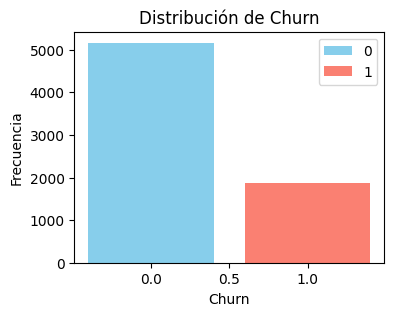

In [83]:
# Gráfico de la variable Churn
plt.figure(figsize=(4, 3))

churn_values = df_full['Churn'].value_counts()
churn_values.values

plt.bar(churn_values.index, churn_values.values, color=['skyblue', 'salmon'], label = churn_values.index)
# Configurar etiquetas y título
plt.xlabel('Churn')
plt.ylabel('Frecuencia')
plt.title('Distribución de Churn')
plt.legend(churn_values.index)
# Mostrar el gráfico
plt.show()

### Variables numéricas

In [84]:
var_numericas = list(df_full.select_dtypes('number'))
var_numericas 


['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges', 'Churn']

Adjuntar CV a función describe()

In [94]:
def describe_con_CV(df, columnas_numericas):
    """Incluye Porc. Nulos y CV a resumen describe

    Args:
        df: dataframe
        columnas_numericas
    
    Return:
        describe con Porc. nulos y CV
    """
    df_describe = df[columnas_numericas].describe()
    #Porcentaje de valores nulos
    porcentaje_nulos = df[columnas_numericas].isnull().mean()*100
    porcentaje_nulos.name = 'Porc_nulos'

    # Calcular el coeficiente de variación (CV)
    # CV = (Desviación estándar / Media)
    cv = (df[columnas_numericas].std() / df[columnas_numericas].mean()) * 100
    cv.name = 'coef_var'

    # Convertir las métricas calculadas en DataFrames
    porcentaje_nulos_df = pd.DataFrame(porcentaje_nulos).T
    cv_df = pd.DataFrame(cv).T

    # Concatenar el resumen original con las nuevas filas
    describe_nuevo = pd.concat([df_describe, porcentaje_nulos_df, cv_df])
    return describe_nuevo
    

In [97]:
describe_nuevo = describe_con_CV(df_full, var_numericas)
describe_nuevo

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn
count,7032.00,7032.00,7032.00,7032.00,7032.00
mean,0.16,32.42,64.80,2283.30,0.27
std,0.37,24.55,30.09,2266.77,0.44
min,0.00,1.00,18.25,18.80,0.00
25%,0.00,9.00,35.59,401.45,0.00
50%,0.00,29.00,70.35,1397.47,0.00
75%,0.00,55.00,89.86,3794.74,1.00
max,1.00,72.00,118.75,8684.80,1.00
Porc_nulos,0.00,0.00,0.00,0.00,0.00
coef_var,227.12,75.71,46.43,99.28,166.22


### Representación gráfica de las variables numéricas

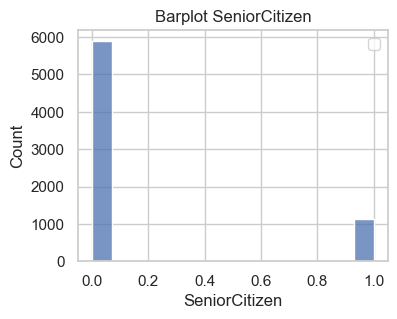

In [116]:
variable = 'SeniorCitizen'
# Configurar el estilo y el tamaño del gráfico
sns.set(style="whitegrid")
plt.figure(figsize=(4, 3))

sns.histplot(df_full[variable],  )
plt.title(f'Barplot {variable}')
plt.xlabel(variable)
plt.ylabel('Count')
plt.legend(title='')

plt.show()

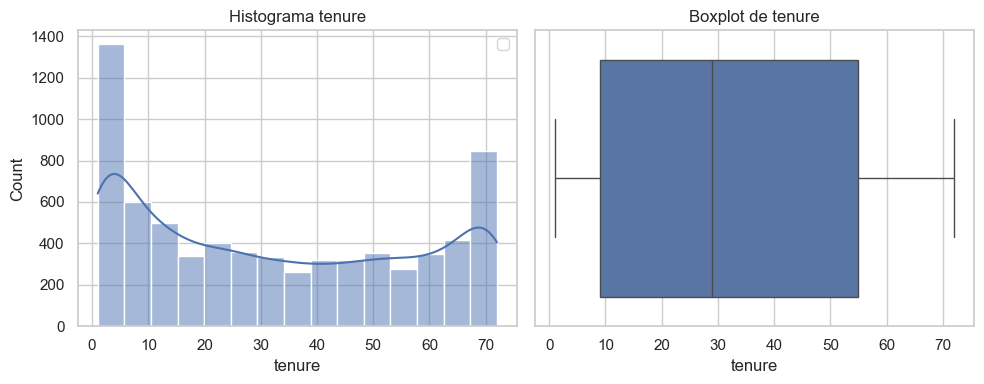

In [140]:
variable = 'tenure'
#target = 'Churn' # debe ser categorica 

# Configurar el estilo y el tamaño del gráfico
sns.set(style="whitegrid")
# Crear una figura con dos subgráficos (histograma y boxplot)
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
sns.histplot(df_full[variable], kde=True) #hue=target 
plt.title(f'Histograma {variable}')
plt.xlabel(variable)
plt.ylabel('Count')
plt.legend(title='')

# Subgráfico 2: Boxplot
plt.subplot(1, 2, 2)
sns.boxplot(data=df_full, x=variable) #, y="class") #, x='Churn'
plt.title(f'Boxplot de {variable}')
plt.xlabel(f'{variable}')
plt.ylabel('')

# Mostrar los gráficos
plt.tight_layout()
plt.show()

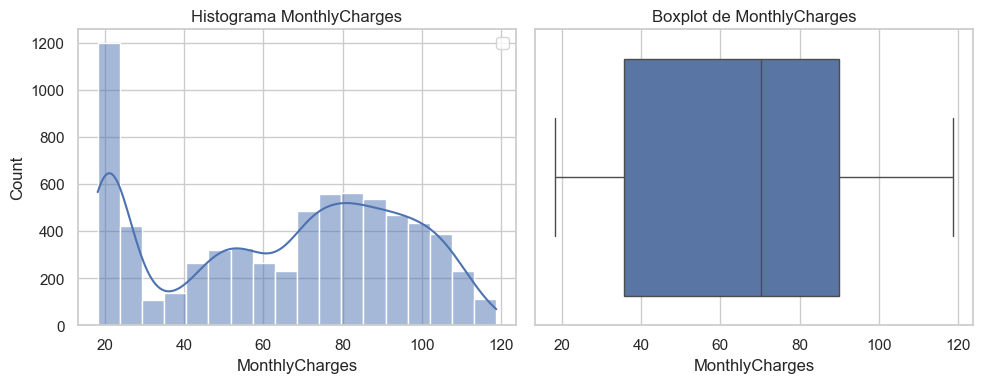

In [141]:
variable = 'MonthlyCharges'
#target = 'Churn' # debe ser categorica 

# Configurar el estilo y el tamaño del gráfico
sns.set(style="whitegrid")
# Crear una figura con dos subgráficos (histograma y boxplot)
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
sns.histplot(df_full[variable], kde=True) #hue=target 
plt.title(f'Histograma {variable}')
plt.xlabel(variable)
plt.ylabel('Count')
plt.legend(title='')

# Subgráfico 2: Boxplot
plt.subplot(1, 2, 2)
sns.boxplot(data=df_full, x=variable) #, y="class") #, x='Churn'
plt.title(f'Boxplot de {variable}')
plt.xlabel(f'{variable}')
plt.ylabel('')

# Mostrar los gráficos
plt.tight_layout()
plt.show()

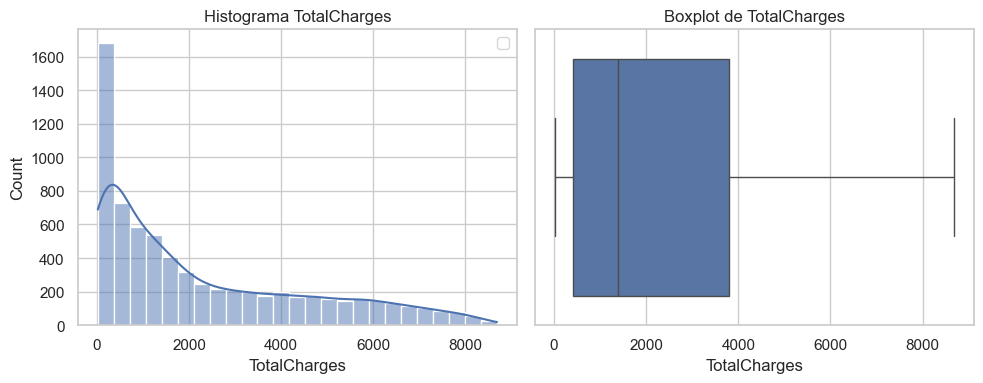

In [142]:
variable = 'TotalCharges'
#target = 'Churn' # debe ser categorica 

# Configurar el estilo y el tamaño del gráfico
sns.set(style="whitegrid")
# Crear una figura con dos subgráficos (histograma y boxplot)
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
sns.histplot(df_full[variable], kde=True) #hue=target 
plt.title(f'Histograma {variable}')
plt.xlabel(variable)
plt.ylabel('Count')
plt.legend(title='')

# Subgráfico 2: Boxplot
plt.subplot(1, 2, 2)
sns.boxplot(data=df_full, x=variable) #, y="class") #, x='Churn'
plt.title(f'Boxplot de {variable}')
plt.xlabel(f'{variable}')
plt.ylabel('')

# Mostrar los gráficos
plt.tight_layout()
plt.show()

### Variables Categóticas

In [59]:
var_categoricas = list(df_sna.select_dtypes('object'))
var_categoricas

['customerID',
 'gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'TotalCharges']